# HSE 2023: Mathematical Methods for Data Analysis

## Homework 1

### Attention!
* For tasks where <ins>text answer</ins> is required **Russian language** is **allowed**.
* If a task asks you to describe something (make conclusions) then **text answer** is **mandatory** and **is** part of the task
* **Do not** upload the dataset (titanic.csv) to the grading system (we already have it)
* We **only** accept **ipynb** notebooks. If you use Google Colab then you'll have to download the notebook before passing the homework
* **Do not** use python loops instead of NumPy vector operations over NumPy vectors - it significantly decreases performance (see why https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/), will be punished with -0.25 for **every** task.
Loops are only allowed in part 1 (Tasks 1 - 4).
* Some tasks contain tests. They only test your solution on a simple example, thus, passing the test does **not** guarantee you the full grade for the task.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Python (2 points)

**Task 1** (0.5 points)<br/>
Enter nonzero numbers `a`, `d` and `N`. Find the sum of the first `N` members of [harmonic sequence](https://en.wikipedia.org/wiki/Harmonic_progression_(mathematics)) with the first member denominator `a`

In [2]:
def find_sum(a: int, d: int, N: int) -> float:
    result = 0
    for i in range(N):
        number = 1 / (a + i * d)
        result += number
    return result

a = 1
d = 1
N = 10
print(find_sum(a, d, N))

2.9289682539682538


**Task 2** (0.5 points) <br/>
Enter an integer number `N`. Check if it is a palindrome number **without converting it to the string**. It means that it can be read equally from left to right and from right to back.

In [3]:
def check_palindrome(N):
    if N < 0:
        return False
    number = N
    reversed = 0
    while N > 0:
        reversed = (reversed * 10) + N % 10
        N = N // 10
    return number == reversed

for N in [3, 81, 111, 113, 810, 2022, 4774, 51315, 611816]:
    print(N, check_palindrome(N))

3 True
81 False
111 True
113 False
810 False
2022 False
4774 True
51315 True
611816 False


**Task 3** (0.5 points) <br/>
Find the first `N` palindrome numbers starting from 42 (you may use the function from the precious task).

In [4]:
def find_palindromes(N):
    palindromes = []
    numb = 42
    while len(palindromes) < N:
        number = numb
        reversed = 0
        while numb > 0:
            reversed = (reversed * 10) + numb % 10
            numb = numb // 10
        if number == reversed:
            palindromes.append(number)
        numb = number + 1
    return palindromes

print(find_palindromes(3))
print(find_palindromes(13))
print(find_palindromes(23))

[44, 55, 66]
[44, 55, 66, 77, 88, 99, 101, 111, 121, 131, 141, 151, 161]
[44, 55, 66, 77, 88, 99, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191, 202, 212, 222, 232, 242, 252, 262]


**Task 4** (0.5 points) <br/>
There are numbers: `a`, `b`, `c`. Without using functions `min`, `max` and other functions, find the median number.

In [5]:
from random import randint

def find_median(a, b, c):
    if a <= b <= c or c <= b <= a:
        return b
    elif b <= a <= c or c <= a <= b:
        return a
    else:
        return c

for i in range(10):
    a = randint(-100, 100)
    b = randint(-100, 100)
    c = randint(-100, 100)
    print(a, b, c, '\tMedian:', find_median(a, b, c))

-54 51 -51 	Median: -51
13 -75 -12 	Median: -12
84 36 54 	Median: 54
47 -15 -99 	Median: -15
-81 -17 73 	Median: -17
61 -88 44 	Median: 44
21 -10 77 	Median: 21
-79 -40 -65 	Median: -65
-100 -41 -8 	Median: -41
-28 -66 -75 	Median: -66


# 2. Numpy (4 points)

**Task 1** (0.5 points) <br/>
Create a random array from Gaussian distribution with length of 12 and with sum of its elements equal to 15. Distribution shall be left Gaussian

In [6]:
my_array = np.random.normal(15/12, 1, 12)
my_array = my_array / np.sum(my_array) * 15
print(f'Length: {len(my_array)}')
print(f'Sum of elements: {np.sum(my_array)}')

Length: 12
Sum of elements: 15.0


**Task 2** (0.5 points) <br/>
Create two random arrays $a$ and $b$ with the same length.

Calculate the following distances between the arrays **without using any special function. You may only use basic numpy operations (`np.linalg.*` and other high-level ones are prohibited).**:

* Manhattan Distance
$$ d(a, b) = \sum_i |a_i - b_i| $$
* Euclidean Distance
$$ d(a, b) = \sqrt{\sum_i (a_i - b_i)^2} $$
* Chebyshev Distance
$$ d(a, b) = \underset{i}{max} |a_i - b_i| $$
* Cosine Distance
$$ d(a, b) = 1 - \frac{a^\top b}{||a||_2\cdot||b||_2} $$


In [7]:
def calculate_manhattan(a, b):
    distance = np.sum(np.abs(a - b))
    return distance

def calculate_euclidean(a, b):
    distance = np.sqrt(np.sum((a - b) ** 2))
    return distance

def calculate_chebyshev(a, b):
    distance = np.max(np.abs(a - b))
    return distance

def calculate_cosine(a, b):
    distance = 1 - np.dot(a, b) / (np.sqrt(np.sum(np.square(a))) * np.sqrt(np.sum(np.square(b))))
    return distance

In [8]:
a = np.random.rand(10)
b = np.random.rand(10)
print(f'Manhattan distance: {calculate_manhattan(a, b)}')
print(f'Euclidean distance: {calculate_euclidean(a, b)}')
print(f'Chebyshev distance: {calculate_chebyshev(a, b)}')
print(f'Cosine distance: {calculate_cosine(a, b)}')

Manhattan distance: 2.959656401278968
Euclidean distance: 1.1716561377073318
Chebyshev distance: 0.785098561044412
Cosine distance: 0.31638653164026365


**Task 3** (0.5 points) <br/>
Create a random array of integers with length of 42. Transform the array so that
* Maximum element(s) value is 10
* Minimum element(s) value is -6
* Other values are in interval (-6; 10) without changing the relative order (relation $\frac{x_i}{x_{i-1}}=\frac{\widehat{x}_{i}}{\widehat{x}_{i-1}}$ holds)

In [9]:
def transform(array):
    maximum = 10
    minimum = -6
    maxi = np.max(array)
    mini = np.min(array)
    d = (maximum-minimum) / (maxi-mini)
    transformed_array = np.round((array-mini) * d + minimum, 10)
    return transformed_array

In [10]:
my_array = np.random.randint(-1000, 1000, 42)
my_array = transform(my_array)
print(f'Min: {np.min(my_array)}')
print(f'Max: {np.max(my_array)}')
print('Array:')
print(my_array)

Min: -6.0
Max: 10.0
Array:
[-4.75165732  3.98674146 -1.87965324 -0.62315145  4.89240184  2.77919429
  4.55787863  4.06833248 -5.54309026 -5.78786333 -4.31106578  2.00407955
 -5.43702193  2.96685365 -5.45334013  9.18408975  5.96124426 -2.736359
  0.64150943 10.          6.7200408   7.97654258  5.35747068 -2.90770015
  6.25497195 -2.11626721  6.80163182 -3.18510964  2.73839878  7.75624681
 -0.23967364 -2.4099949  -5.0209077   7.87863335 -2.51606323  3.83987761
 -6.          1.56348802 -2.88322285 -3.27485977 -0.91687914 -2.85058644]


**Task 4** (0.5 points) <br/>
Create an array with shape of $10 \times 3$ with integers from [-12, 4]. Find a column that contains the minimum element of the array.

In [11]:
my_array = np.random.randint(-12, 5, size=(10, 3))
selected_column = np.argmin(my_array) // my_array.shape[1]
print('Shape: ', my_array.shape)
print('Array:')
print(my_array)
print(f'Selected column: {selected_column}')
print('# Columns are counted starting from 0')

Shape:  (10, 3)
Array:
[[-10  -9  -9]
 [-10  -9  -8]
 [ -1   4  -6]
 [  3  -6 -10]
 [ -9   4 -11]
 [  1  -8 -12]
 [ -2   2   2]
 [ -4  -8  -8]
 [ -6   0  -5]
 [  1  -4  -8]]
Selected column: 5
# Columns are counted starting from 0


**Task 5** (0.5 points) <br/>

Replace all missing values in the following array with the most appropriate quantile, explain why you chose it.

In [12]:
arr = np.random.rand(10)
idx = np.random.randint(0, 10, 4)
arr[idx] = np.nan

print('Array:')
print(arr)

Array:
[       nan        nan 0.28224577 0.28803726        nan 0.08703962
 0.06913594        nan 0.39523883 0.85450526]


The most popular options could be median, 0.95 quantile or 0.99 quantile.
Since the array is generated randomly and we cannot say anything about the values, I think the best solution will be to choose the median, because it will strengthen the "middle" of the array and will not create any unusually high or unusually low values.

In [13]:
def replace_missing(arr):
    quantile = np.nanquantile(arr, 0.5)
    arr[np.isnan(arr)] = quantile
    return arr

In [14]:
arr = replace_missing(arr)
print('Array with no missing values:')
print(arr)

Array with no missing values:
[0.28514152 0.28514152 0.28224577 0.28803726 0.28514152 0.08703962
 0.06913594 0.28514152 0.39523883 0.85450526]


**Answer:** The most popular options could be median, 0.95 quantile or 0.99 quantile. Since the array is generated randomly and we cannot say much about the values, I think the best solution will be to choose the median, because it will strengthen the "middle" of the array and will not create any unusually high or unusually low values.

**Task 6** (0.5 points) <br/>
Create a function which takes an image ```X``` (3D array of the shape (n, m, 3)) as an input and returns the median and std for every channel (you should get a vector of shape 3, RGB).

In [15]:
def stats_channel(X):
    median = np.median(X, axis=(0, 1))
    std = np.std(X, axis=(0, 1))
    return median, std

In [16]:
n = 19
m = 23
X = np.random.randint(-11, 8, size=(n, m, 3))
print(stats_channel(X))

(array([-2., -2., -2.]), array([5.54003112, 5.5483304 , 5.5949989 ]))


### **Task 7** (1 points) <br/>
Create a function which takes a 3D matrix ```X``` as an input and returns all its unique values along the first axis.

Sample input:

```
np.array(
  [[[1, 2, 3],
    [1, 2, 3],
    [1, 2, 3]],

   [[4, 5, 6],
    [4, 5, 7],
    [4, 5, 6]],

   [[7, 8, 9],
    [7, 8, 9],
    [7, 8, 9]]]
)
```
  
Sample output:

```
np.array(
  [[[1, 2, 3],
    [1, 2, 3]],

   [[4, 5, 6],
    [4, 5, 7]],

   [[7, 8, 9],
    [7, 8, 9]]]
)
```

In [17]:
def get_unique_values(X):
    result = np.unique(X, axis=1)
    return result

In [18]:
n = 9
X =  np.random.randint(4, 6, size=(n, 3, 3))
print('Matrix:')
print(X)
print('Unique :')
get_unique_values(X)

Matrix:
[[[4 4 4]
  [5 5 4]
  [4 5 5]]

 [[5 5 5]
  [5 5 4]
  [4 4 5]]

 [[4 4 4]
  [5 5 5]
  [5 4 5]]

 [[5 5 4]
  [4 5 4]
  [4 5 4]]

 [[5 4 4]
  [4 4 4]
  [4 4 5]]

 [[4 4 5]
  [4 4 5]
  [4 4 5]]

 [[4 5 4]
  [4 5 4]
  [4 5 5]]

 [[4 4 4]
  [5 5 5]
  [5 4 4]]

 [[4 5 5]
  [5 4 5]
  [4 4 4]]]
Unique :


array([[[4, 4, 4],
        [4, 5, 5],
        [5, 5, 4]],

       [[5, 5, 5],
        [4, 4, 5],
        [5, 5, 4]],

       [[4, 4, 4],
        [5, 4, 5],
        [5, 5, 5]],

       [[5, 5, 4],
        [4, 5, 4],
        [4, 5, 4]],

       [[5, 4, 4],
        [4, 4, 5],
        [4, 4, 4]],

       [[4, 4, 5],
        [4, 4, 5],
        [4, 4, 5]],

       [[4, 5, 4],
        [4, 5, 5],
        [4, 5, 4]],

       [[4, 4, 4],
        [5, 4, 4],
        [5, 5, 5]],

       [[4, 5, 5],
        [4, 4, 4],
        [5, 4, 5]]])

# 3. Pandas & Visualization (4 points)


You are going to work with *Titanic* dataset which contains information about passengers of Titanic:
- **Survived** - 1 - survived, 0 - died (0); **Target variable**
- **pclass** - passengers's class;
- **sex** - passengers's sex
- **Age** - passengers's age in years
- **sibsp**    - is the passenger someones siblings   
- **parch**    - is the passenger someones child or parent
- **ticket** - ticket number    
- **fare** - ticket price    
- **cabin** - cabin number
- **embarked** - port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

**Note** for all visualizations use matplotlib or seaborn but NOT plotly! Plotly's graphics sometimes vanish after saving. In this case the task won't be graded.

**Note** support all your answers with necessary code, computations, vizualization, and explanation. Answers without code and explanation won't be graded.

**Task 0** (0 points) \
Load the dataset and print first 6 rows

In [19]:
import pandas as pd

dataset = pd.read_csv('titanic.csv')
print(dataset.head(6))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN       

**Task 1** (1 points) <br/>
Answer the following questions:
    
    * Are there any missing values? In what columns?
    * What is the percentage of survived passengers? Are the classes balanced?
    * Were there more males or females?
    * What what the least popular port of embarkation?
    * How many passenger classes (pclass) were there on Tinanic?
    * What is the overall average ticket fare? And for every passenger class?
Please, write not only the answers but the code, proving it.

In [20]:
## * Are there any missing values? In what columns?
## To check for any missing values, we have to look for NaN elements in the dataset.
## We can use the function isnull() to do that (and here I print the number of missing values in each column)
miss = dataset.isnull().sum()
print(f"The number of missing (NaN) elements in each column: {miss}")
# As we can see, columns Age, Cabin, and Embarkes have some missing (NaN) elements.

The number of missing (NaN) elements in each column: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [21]:
## * What is the percentage of survived passengers? Are the classes balanced?
## Since in the Survived column "0" means not surviving and "1" means surviving, we can calculate the percentage using the mean function.
survived_percent = dataset["Survived"].mean() * 100
print(f'The percentage of survived passengers: {survived_percent}%\n\n')
# So, 38.38383838 percent survived

# Now, to find out if the classes are balanced, we have to count the number of passengers in each of the classes.
classes = dataset['Pclass'].value_counts()
print(f'The number of passengers in each class: {classes}\n\n')

# The classes are not balanced, so let's recount the percentage of survivors in each class
survivors = dataset[dataset['Survived'] == 1]
classes = survivors['Pclass'].value_counts() / dataset['Pclass'].value_counts() * 100
print(f'The percentage of survived passengers by class: {classes}% survived')

# As we can see, the percentage of survivors in each of the classes differs a lot.
# The biggest percentage of survivors is in the first class (about 63%), almost 50% of sirvivors in the 2nd class, 
# and only a quarter of the 3rd class managed to survive.

The percentage of survived passengers: 38.38383838383838%


The number of passengers in each class: Pclass
3    491
1    216
2    184
Name: count, dtype: int64


The percentage of survived passengers by class: Pclass
1    62.962963
2    47.282609
3    24.236253
Name: count, dtype: float64% survived


In [22]:
## * Were there more males or females?
## Let's count the number of male and female passengers
sex_counts = dataset["Sex"].value_counts()
print("Number of males: ", sex_counts["male"])
print("Number of females: ", sex_counts["female"])
# As we can see, there were more males

Number of males:  577
Number of females:  314


In [23]:
## * What what the least popular port of embarkation?
## Let's find the least popular port of embarktion using the idxmin function
ports = dataset["Embarked"].value_counts()
unpopular = ports.idxmin()
print(f"The least popular port of embarkation: {unpopular}")
## As we can see, the least popular port of embarktion is Q

The least popular port of embarkation: Q


In [24]:
## * How many passenger classes (pclass) were there on Tinanic?
## To count the number of passenger classes we should use the function nunique
classes = dataset["Pclass"].nunique()
print("Number of passenger classes: ", classes)
## As expected, there are 3 classes

Number of passenger classes:  3


In [25]:
## * What is the overall average ticket fare? And for every passenger class?
# To find out the overall average ticket fare we can use the mean function
average = dataset["Fare"].mean()
print(f"Overall average ticket fare: {average}\n\n")

# To find out the average ticket fare for each passenger class we may group the results by "Pclass" field
average_with_class = dataset.groupby("Pclass")["Fare"].mean()
print(f"Average ticket fare by passenger class: {average_with_class}")

Overall average ticket fare: 32.204207968574636


Average ticket fare by passenger class: Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


**Task 2** (0.5 points) <br/>
Visualize age distribution (you may use a histogram, for example).

    * What is the minimal and maximum ages of the passengers? Visualize it on the plot
    * What is the median age? And among males and females separately? Visualize it on the separate plot
    * Make conclusions about what you see on the plots

The minimum age is 0.42 years, and the maximum age is 80.0 years




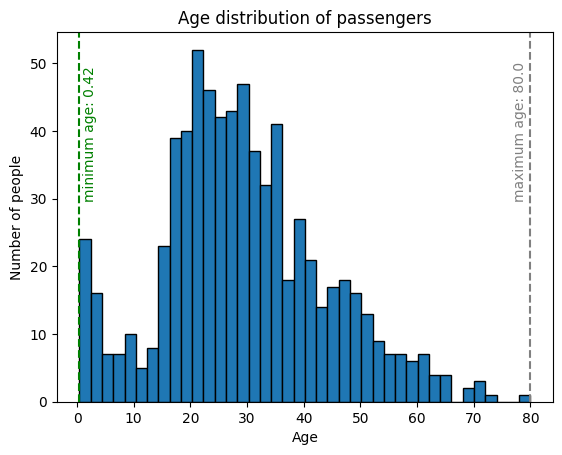

In [26]:
import matplotlib.pyplot as plt

## * What is the minimal and maximum ages of the passengers? Visualize it on the plot
mini = dataset['Age'].min()
maxi = dataset['Age'].max()
print(f'The minimum age is {mini} years, and the maximum age is {maxi} years\n\n')

plt.hist(dataset['Age'].dropna(), bins=40, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.title('Age distribution of passengers')
plt.axvline(mini, color='g', linestyle='--', label='Min age')
plt.text(1,30,f'minimum age: {mini}',rotation=90, color='g')
plt.axvline(maxi, color='grey', linestyle='--', label='Max age')
plt.text(77,30,f'maximum age: {maxi}',rotation=90, color='grey')
plt.show()

Median age: 28.0
Median age for males: 29.0
Median age for females: 27.0



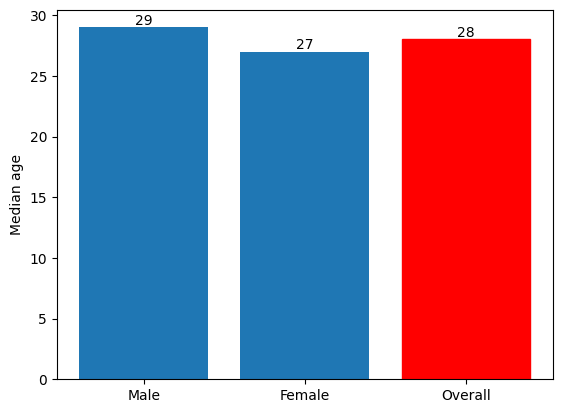

In [27]:
## * What is the median age? And among males and females separately? Visualize it on the separate plot
median_age = dataset["Age"].median()
median_age_male = dataset.groupby("Sex")["Age"].median()["male"]
median_age_female = dataset.groupby("Sex")["Age"].median()["female"]
print("Median age:", median_age)
print("Median age for males:", median_age_male)
print("Median age for females:", median_age_female)
print()

barlist = plt.bar(["Male", "Female", "Overall"], [median_age_male, median_age_female, median_age])
barlist[2].set_color('r')
plt.ylabel("Median age")
plt.bar_label(barlist)
plt.show()

* Make conclusions about what you see on the plots

If we look at the ages of passengers, we will see that they vary a lot, with the minimum being less than 6 months (0.42 years) and the maximum being 80 years old. However, if we look at the median, the overall median is 28 years. If we research it further, we can see that the median age was different for males and females, with the median age for men being 29 years, and the medan age for women being 27 years.

**Task 3** (1 points) <br/>
Find all the titles of the passengers (example, *Capt., Mr.,Mme.*), which are written in the column Name, and answer the following questions:

    * How many are there unique titles?
    * How many are there passengers with every title?
    * What is the most popular man's title? And woman's title?
    
**Hint** You may select the title from the name as a word which contains a dot and is not middle name.

In [28]:
## For starters, let's extract the titles using the regular expression below
import re

dataset["Title"] = dataset["Name"].apply(lambda x: re.search(' ([A-Za-z]+)\.', x).group(1))

In [29]:
## * How many are there unique titles?

uniq = dataset["Title"].nunique()
print("Number of unique titles: ", uniq)

Number of unique titles:  17


In [30]:
## * How many are there passengers with every title?
pass_with_title = dataset["Title"].value_counts()
print("Passengers with each title: ")
print(pass_with_title)

Passengers with each title: 
Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64


In [31]:
## * What is the most popular man's title? And woman's title?
pop_man = dataset.loc[dataset["Sex"] == "male", "Title"].value_counts().idxmax()
pop_woman = dataset.loc[dataset["Sex"] == "female", "Title"].value_counts().idxmax()

print("The most popular man's title: ", pop_man)
print("The most popular woman's title: ", pop_woman)

The most popular man's title:  Mr
The most popular woman's title:  Miss


**Task 4** (0.5 points) <br/>
Is there correlation between *pclass* and *ticket price*? Calculate mean price for each class and visualize price distribution for each class as well. Make conclusions about what you see on the plot

Hint: you could make one or several plot types i.e.  box, violine, pair, histogram (see additional notebooks for Seminar 1 "Visualization with Seaborn"). Main point here is to **choose** plots wisely and **make meaningful conclusions**



Mean price by class:
Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64



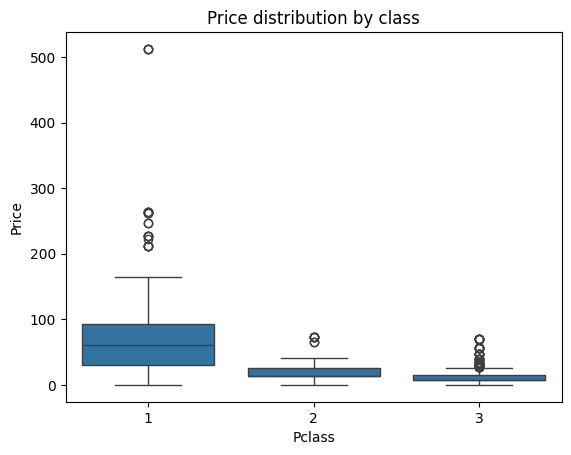

In [32]:
import seaborn as sns

## Firstly, we can calculate the mean price by class
mean_by_class = dataset.groupby("Pclass")["Fare"].mean()
print("Mean price by class:")
print(mean_by_class)
print()

# Secondly, we can visualize them using a boxplot
plt.figure()
sns.boxplot(x="Pclass", y="Fare", data=dataset)
plt.title("Price distribution by class")
plt.xlabel("Pclass")
plt.ylabel("Price")
plt.show()

To conclude, we can see that there is a visible correlation between the class and the ticket price. The higher the class, the higher the price. Additionally, there is a wider range of the prices in the first class (to be exact, the highest price is an outlier on the graph).

**Task 5** (0.5 points) <br/>
The same question as in task 4 about correlation between *embarked* and *ticket priсe*.

Mean price by port:
Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64


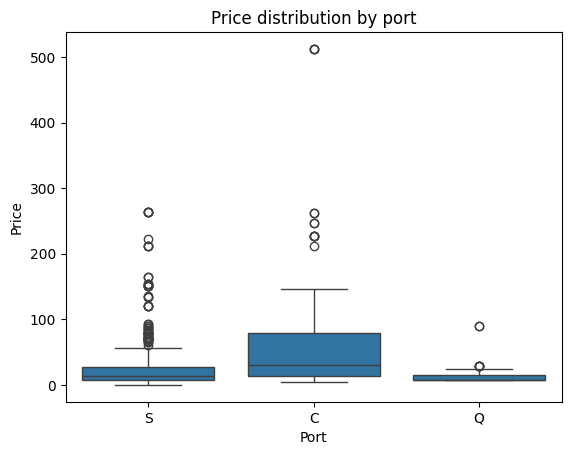

In [33]:
## The algorithm is similar to the previous task.
## For starters, let's calculate mean price for each port of embarkation
mean_by_port = dataset.groupby("Embarked")["Fare"].mean()
print("Mean price by port:")
print(mean_by_port)

## Next, let's visualize price distribution for each port of embarkation
plt.figure()
sns.boxplot(x="Embarked", y="Fare", data=dataset)
plt.title("Price distribution by port")
plt.xlabel("Port")
plt.ylabel("Price")
plt.show()

To conclude, we can see that the mean price is the highest for port C, and the lowest for port Q. One more interesting feature is that there is an outlier in the port C (with a very high price).

**Task 6** (0.5 points) <br/>
Visualize age distribution for survived and not survived passengers separately and calculate the mean age for each class. Are they different? Provide the same visualization for males and females separately. Make conclusions about what you see on the plots

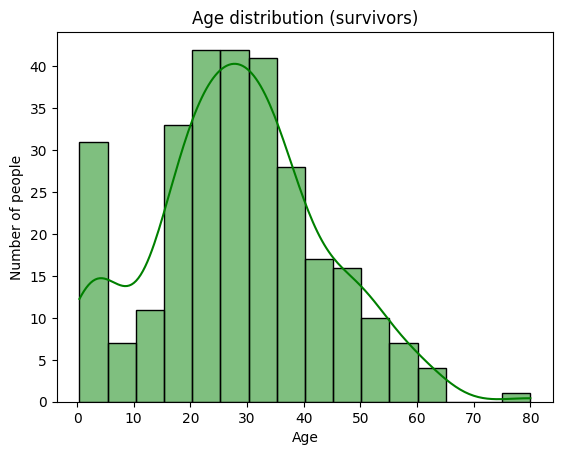

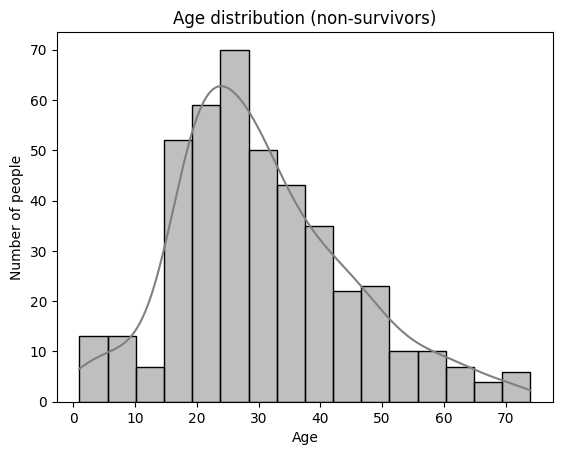

Mean age per class: Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


In [34]:
# Let's create special datasets for those who survived, and those who did not
survivors = dataset[dataset["Survived"] == 1]
nonsurvivors = dataset[dataset["Survived"] == 0]

# Visualizing the age distribution for survivors
plt.figure()
sns.histplot(data=survivors, x="Age", kde=True, color="g")
plt.title("Age distribution (survivors)")
plt.xlabel("Age")
plt.ylabel("Number of people")
plt.show()

# Visualizing the age distribution for non-survivors
plt.figure()
sns.histplot(data=nonsurvivors, x="Age", kde=True, color="grey")
plt.title("Age distribution (non-survivors)")
plt.xlabel("Age")
plt.ylabel("Number of people")
plt.show()

# Let's find out the mean for each class
mean_by_class = dataset.groupby("Pclass")["Age"].mean()
print(f"Mean age per class: {mean_by_class}")

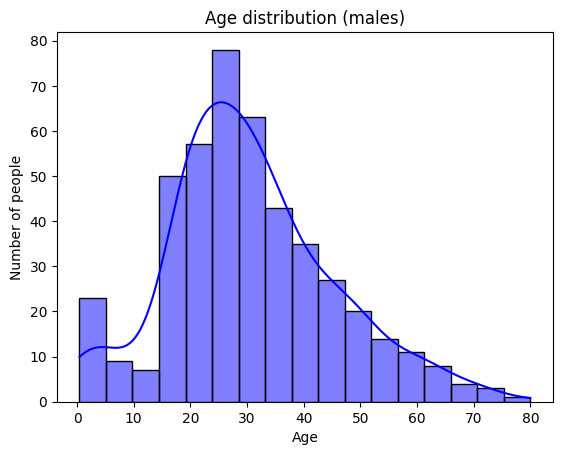

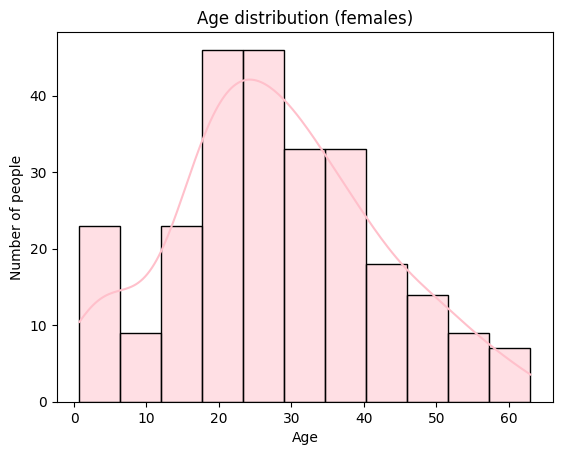

In [35]:
# Let's create special datasets for male and female passengers
males = dataset[dataset["Sex"] == "male"]
females = dataset[dataset["Sex"] == "female"]

# Then we'll visualize age distribution for male passengers, and after that for females
plt.figure()
sns.histplot(data=males, x="Age", kde=True, color="b")
plt.title("Age distribution (males)")
plt.xlabel("Age")
plt.ylabel("Number of people")
plt.show()

plt.figure()
sns.histplot(data=females, x="Age", kde=True, color="pink")
plt.title("Age distribution (females)")
plt.xlabel("Age")
plt.ylabel("Number of people")
plt.show()

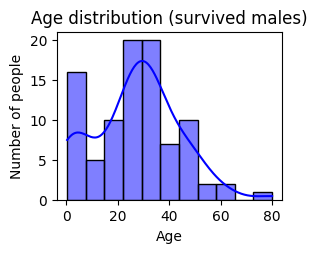

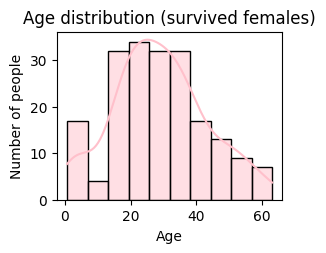

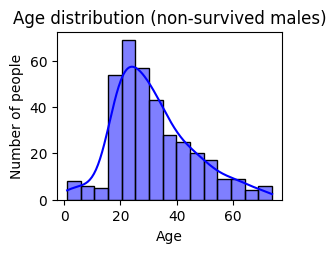

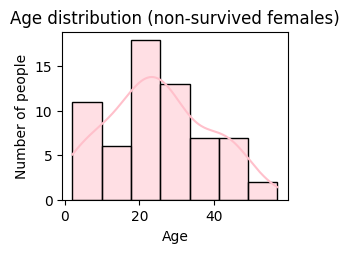

In [37]:
# Let's create special datasets for males and females, survived males and females, and females and males who didn't survive.
males_all = dataset[dataset["Sex"] == "male"]
females_all = dataset[dataset["Sex"] == "female"]
males_surv = males_all[males_all["Survived"] == 1]
females_surv = females_all[females_all["Survived"] == 1]
males_nonsurv = males_all[males_all["Survived"] == 0]
females_nonsurv = females_all[females_all["Survived"] == 0]

# Then we'll visualize age distribution for survivors (m and f), and then for non-survivors(m and f)
plt.figure()
plt.subplot(2,2,1)
sns.histplot(data=males_surv, x="Age", kde=True, color="b")
plt.title("Age distribution (survived males)")
plt.xlabel("Age")
plt.ylabel("Number of people")
plt.show()

plt.subplot(2,2,2)
sns.histplot(data=females_surv, x="Age", kde=True, color="pink")
plt.title("Age distribution (survived females)")
plt.xlabel("Age")
plt.ylabel("Number of people")
plt.show()

plt.subplot(2,2,3)
sns.histplot(data=males_nonsurv, x="Age", kde=True, color="b")
plt.title("Age distribution (non-survived males)")
plt.xlabel("Age")
plt.ylabel("Number of people")
plt.show()

plt.subplot(2,2,4)
sns.histplot(data=females_nonsurv, x="Age", kde=True, color="pink")
plt.title("Age distribution (non-survived females)")
plt.xlabel("Age")
plt.ylabel("Number of people")
plt.show()

Now let's analyze the data.

The age distribution of survivors shows a peak around 20-35 years and decreases for older ages. It is also interesting to note that a lot of babies (aged 0-5 years) managed to survive. The pattern for non-survivors is somewhat similar, but we see higher rates for older people, which suggests they were more likely to not survive.

The mean age is also different for different classes. We can observe that the higher the class, the older the passengers are on average. 

If we compare the data for males and females, we'll see that the peak age for men is around 25-35 years, whereas for women it's around 18-28 years. Males also have a wider range (from 0 to 80 years), whereas the eldest women are not more than 65 years old. 

Now let's separately look into survived males and females, and non-survived males and females. We can see that most of the males who survived were 20-40, and the female survivors were 15-40. In addition, many babies and toddlers of both sexes managed to survive. If we look into those who did not survive, we'll see that males are spread more evenly, with those aged 15-35 being the least lucky. For females the most non-survivors were around 20 years. Also, if we look at the total number of people on the graph, we'll see that some age groups of men had more than 60 casualties, whereas the most unlucky age group of women was a bit more than 15. Thus, we can say that females were more lucky (obviously, because females and kids are resqued first).

## Final words

This analysis suggests that there are a lot of different factors to consider when researching the data of the passengers of Titanic. We can see some trends when visualising information depending on the classes of passengers, their ages and sex, and their ticket prices. However, in order to draw conclusions, we need to take all of the factors into consideration.